# ifood - Building of the decision tree model 
Robson Müller

The company has invested in a pilot marketing campaign in order to sell a gadget, involving 2.240 customers, which were later contacted by phone and the ones who bougth were labeled. This campaign had a negative profit of around -3.046MU with a sucess rate of 15%. 

"Hey guys, how could we help the company to succeed in this project and make this campaing more effective and profitable ?"

After some discussion, we approched 2 main tasks:

    1. Provide an insightfull data exploration filled with cause and effect for better marketing team understanding of the characteristics features of respondents.  
    2. Customer segmentation proposal based on behavior.
    3. Develop a model in order to predict customer behavior and find out those which are most likely to accept the offer, making the campaing highly profitable. 

So, based on this scenario we will develop a Decision Tree model, in order to predict in which campaing the customer are more likely to accept the marketing offer

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('ifood_data_analysis_final.csv')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df

,ID,Year_birth,Education,Marital_status,Income,N_kids,N_teens,Customer_entry_date,Days_last_purchase,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain_last_2yrs,Cost_per_cmp,Total_revenue,AcceptedLastCmp,Conversion_cmp,N_cmp,Cac,Income_binned
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,cmp6,6,18,Medium Income
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,0,0,no_conversion,6,18,Medium Income
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,0,0,no_conversion,6,18,High Income
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,0,0,no_conversion,6,18,Low Income
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,0,0,no_conversion,6,18,Medium Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,0,0,no_conversion,6,18,Medium Income
2199,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,cmp1,1,3,Medium Income
2200,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,cmp4,4,12,Medium Income
2201,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,0,0,no_conversion,6,18,Medium Income


We will remove the columns containing the target name, since it doesn't contain numeric data

In [7]:
df['Education'].unique()
#df['Marital_status'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

It is necessary to transform categorical data into numeric, since Classification Tree do not work with text data

In [8]:
X = df[['ID', 'Year_birth', 'Education', 'Marital_status', 'Income', 'N_kids',
       'N_teens','Days_last_purchase', 'MntWines',
       'MntFruits', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold',
       'N_purchases_discount', 'N_purchases_website', 'N_purchases_catalog',
       'N_purchases_store', 'N_visits_site_month', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain_last_2yrs', 'Cost_per_cmp', 'Total_revenue',
       'AcceptedLastCmp','N_cmp', 'Cac'
             '']].values
X[0:5]

array([[5524, 1957, 'Graduation', 'Single', 58138.0, 0, 0, 58, 635, 88,
        546, 172, 88, 88, 3, 8, 10, 4, 7, 0, 0, 0, 0, 0, 0, 3, 11, 1, 6,
        18],
       [2174, 1954, 'Graduation', 'Single', 46344.0, 1, 1, 38, 11, 1, 6,
        2, 1, 6, 2, 1, 1, 2, 5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 18],
       [4141, 1965, 'Graduation', 'Together', 71613.0, 0, 0, 26, 426, 49,
        127, 111, 21, 42, 1, 8, 2, 10, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6,
        18],
       [6182, 1984, 'Graduation', 'Together', 26646.0, 1, 0, 26, 11, 4,
        20, 10, 3, 5, 2, 2, 0, 4, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 18],
       [5324, 1981, 'PhD', 'Married', 58293.0, 1, 0, 94, 173, 43, 118,
        46, 27, 15, 5, 5, 3, 6, 5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 18]],
      dtype=object)

In [9]:
from sklearn import preprocessing
le_edu = preprocessing.LabelEncoder()
le_edu.fit(['Single','Together','Married','Divorced','Widow'])
X[:,3] = le_edu.transform(X[:,3]) 

le_marital = preprocessing.LabelEncoder()
le_marital.fit([ 'Graduation', 'PhD', 'Master','Basic','2n Cycle'])
X[:,2] = le_marital.transform(X[:,2])
 

X[0:5]

array([[5524, 1957, 2, 2, 58138.0, 0, 0, 58, 635, 88, 546, 172, 88, 88,
        3, 8, 10, 4, 7, 0, 0, 0, 0, 0, 0, 3, 11, 1, 6, 18],
       [2174, 1954, 2, 2, 46344.0, 1, 1, 38, 11, 1, 6, 2, 1, 6, 2, 1, 1,
        2, 5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 18],
       [4141, 1965, 2, 3, 71613.0, 0, 0, 26, 426, 49, 127, 111, 21, 42,
        1, 8, 2, 10, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 18],
       [6182, 1984, 2, 3, 26646.0, 1, 0, 26, 11, 4, 20, 10, 3, 5, 2, 2,
        0, 4, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 18],
       [5324, 1981, 4, 1, 58293.0, 1, 0, 94, 173, 43, 118, 46, 27, 15, 5,
        5, 3, 6, 5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 18]], dtype=object)

Filling the target

In [10]:
y = df["Conversion_cmp"]
y[0:5]

0             cmp6
1    no_conversion
2    no_conversion
3    no_conversion
4    no_conversion
Name: Conversion_cmp, dtype: object

# Setting up the model
Data gonna be split in train and test sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>ifoodTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [13]:
ifoodTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
ifoodTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [14]:
ifoodTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [15]:
predTree = ifoodTree.predict(X_testset)

In [18]:
print (predTree [0:10])
print (y_testset [0:10])

['no_conversion' 'no_conversion' 'no_conversion' 'no_conversion'
 'no_conversion' 'no_conversion' 'cmp3' 'cmp3' 'no_conversion'
 'no_conversion']
1574    no_conversion
1748    no_conversion
1833    no_conversion
876     no_conversion
1001    no_conversion
1435    no_conversion
1153             cmp3
1885             cmp3
475     no_conversion
1353    no_conversion
Name: Conversion_cmp, dtype: object


## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [46]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [47]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [48]:
#conda install pydotplus

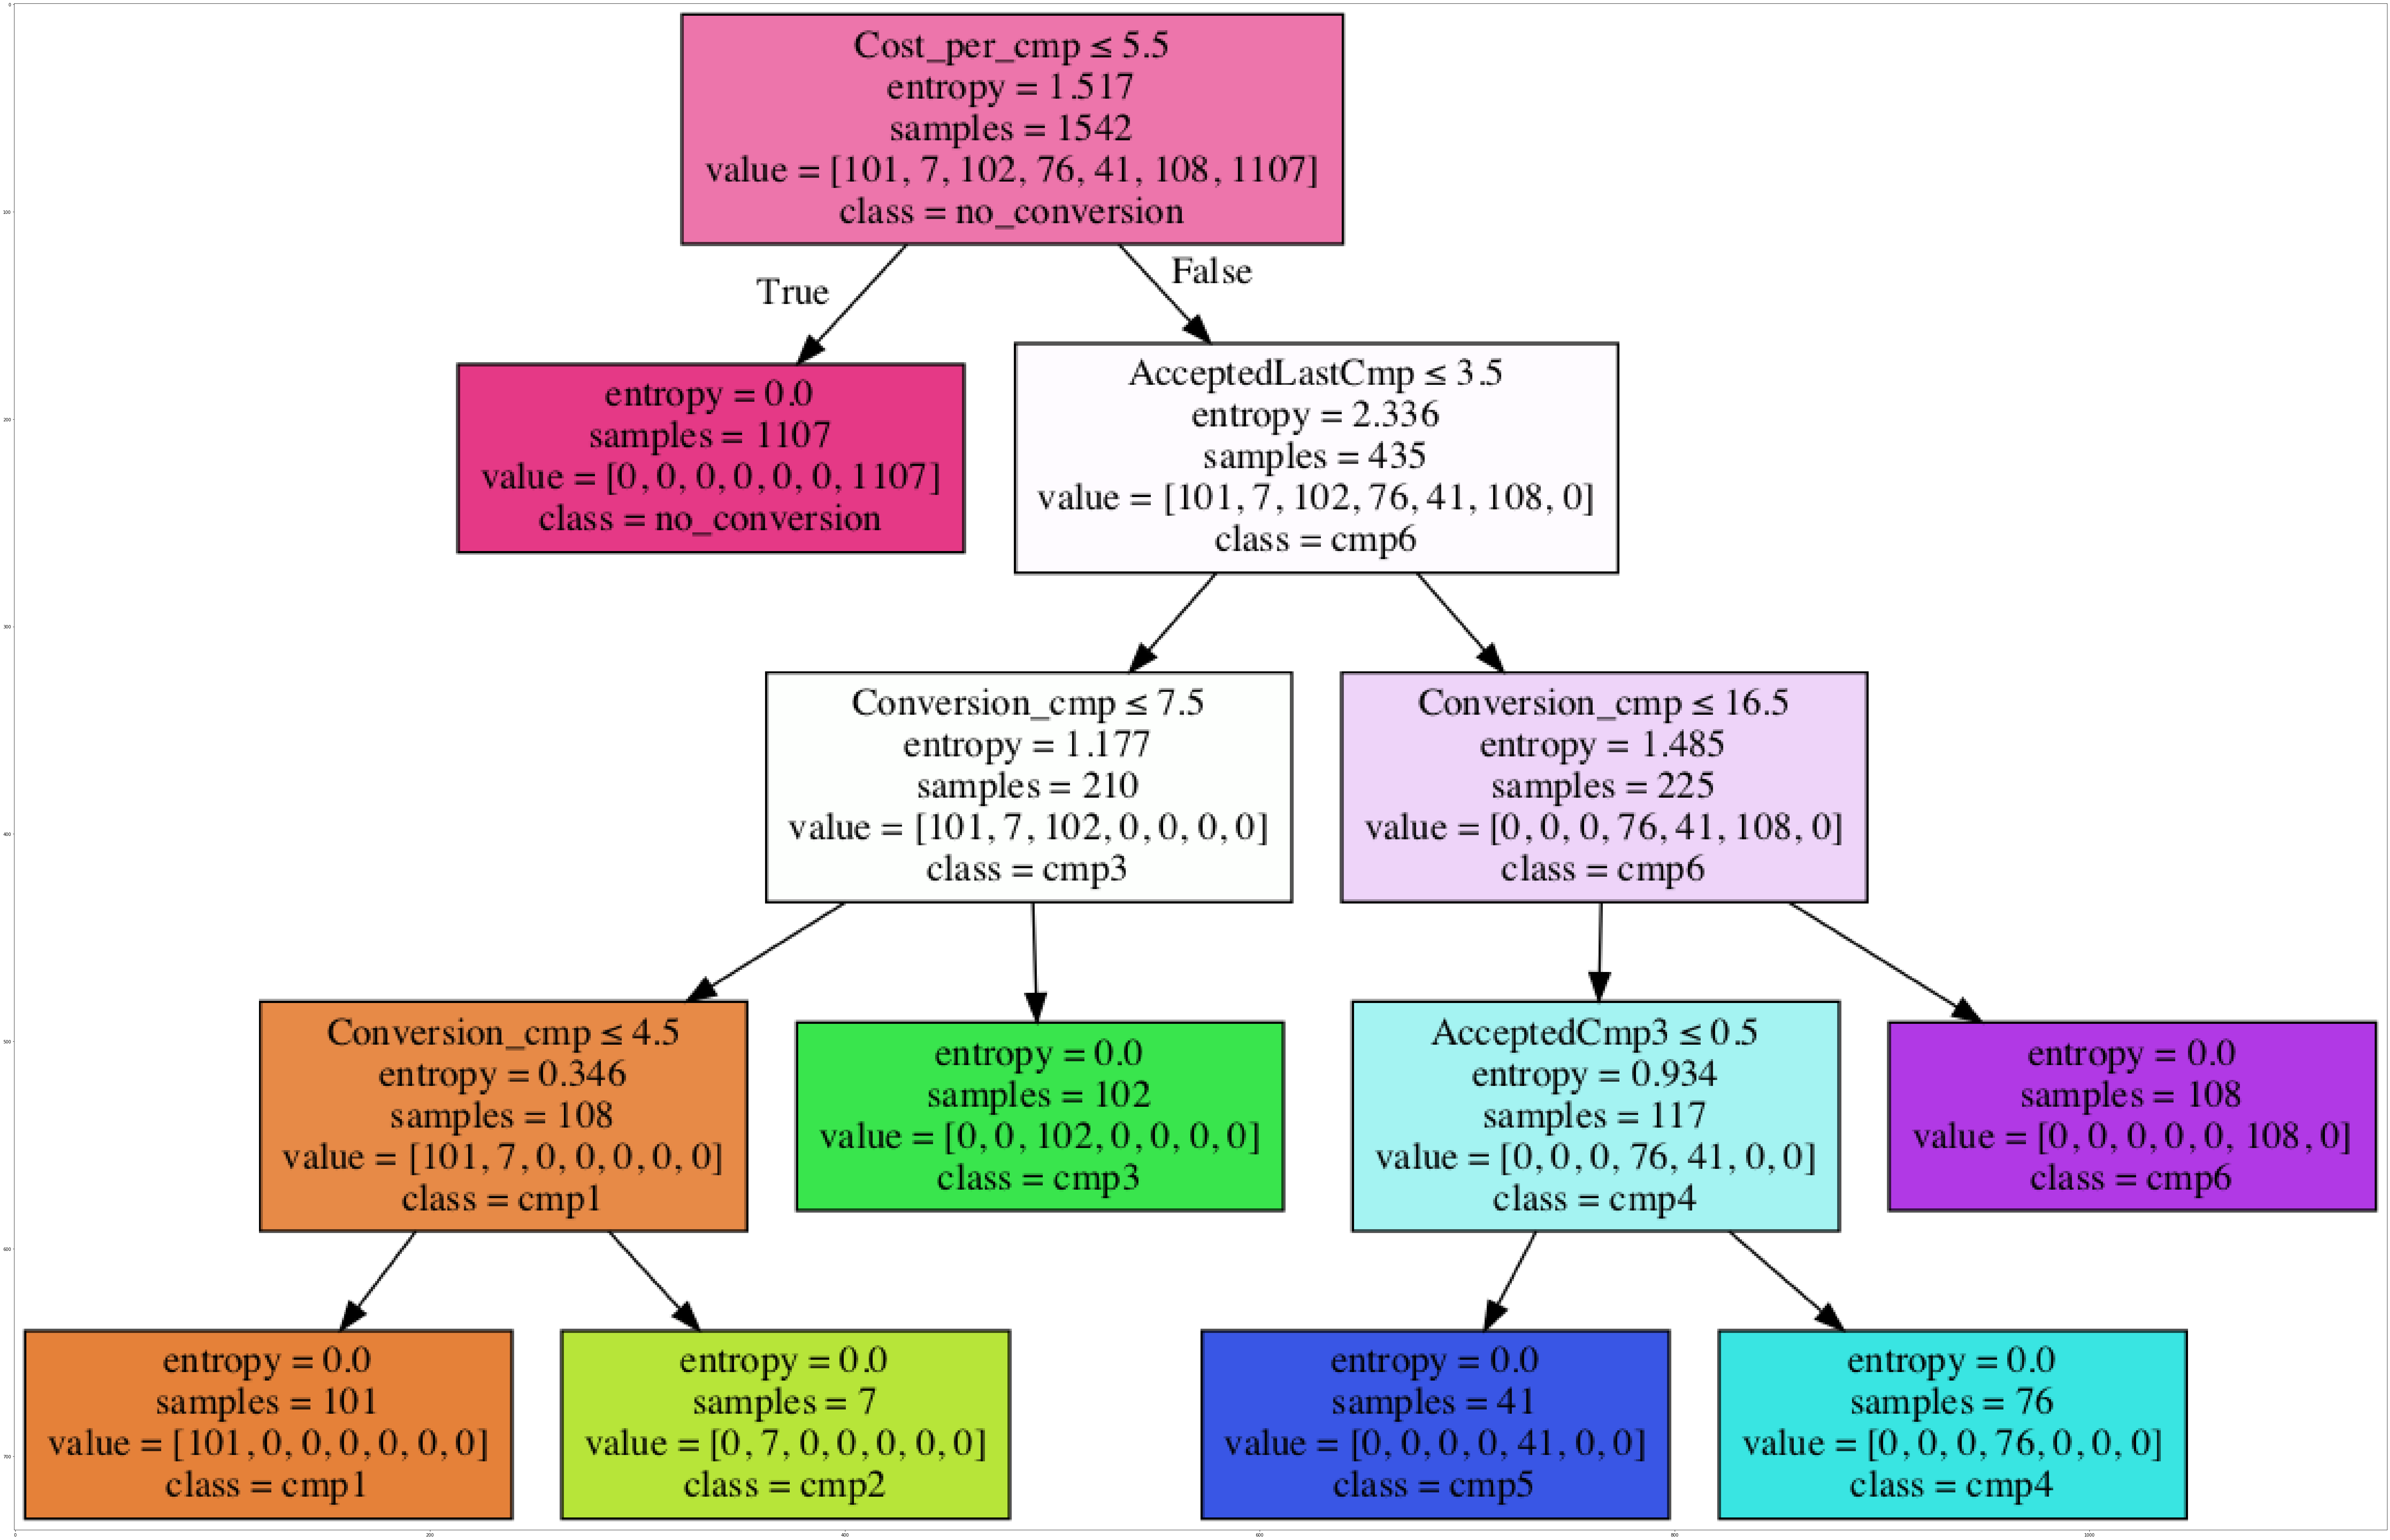

In [49]:
dot_data = StringIO()
filename = "ifoodtree.png"
featureNames = df.columns[0:30]
targetNames = df["Conversion_cmp"].unique().tolist()
out=tree.export_graphviz(ifoodTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')